In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
files = glob.glob('./ImageOfSY/*')
files

['./ImageOfSY\\0001.png',
 './ImageOfSY\\0002.png',
 './ImageOfSY\\0003.png',
 './ImageOfSY\\0004.png',
 './ImageOfSY\\0005.png',
 './ImageOfSY\\lenna.bmp',
 './ImageOfSY\\pepper.bmp']

## 查看所有图像

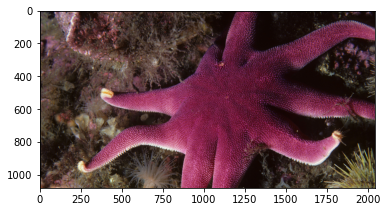

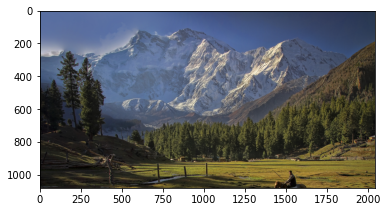

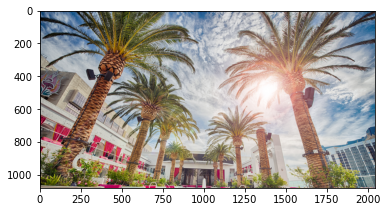

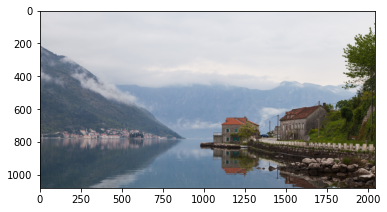

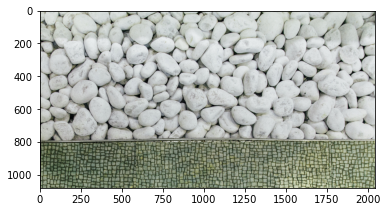

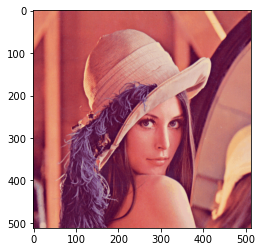

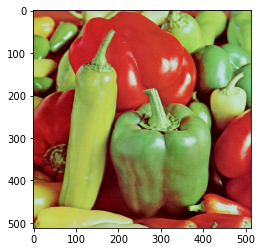

In [3]:
for file in files:
    img = cv2.imread(file)
    plt.subplots()
    plt.imshow(img[...,::-1])

## 1. 输出RGB

- 由于opencv读出的图像是bgr顺序，因此在plt时需要对其矩阵进行倒序

(512, 512, 3)


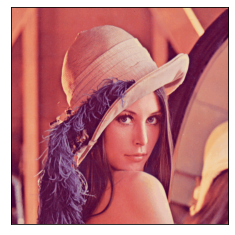

In [3]:
img = cv2.imread(files[-2])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [4]:
# r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
r, g, b = cv2.split(img)
r, g, b

(array([[222, 222, 226, ..., 226, 218, 198],
        [222, 222, 226, ..., 226, 218, 198],
        [222, 222, 226, ..., 226, 218, 198],
        ...,
        [ 80,  80,  89, ..., 170, 174, 170],
        [ 80,  80,  93, ..., 178, 178, 182],
        [ 80,  80,  93, ..., 178, 178, 182]], dtype=uint8),
 array([[133, 133, 137, ..., 145, 121,  93],
        [133, 133, 137, ..., 145, 121,  93],
        [133, 133, 137, ..., 145, 121,  93],
        ...,
        [ 16,  16,  20, ...,  64,  64,  56],
        [ 16,  16,  24, ...,  68,  68,  68],
        [ 16,  16,  24, ...,  68,  68,  68]], dtype=uint8),
 array([[121, 121, 129, ..., 121, 105,  89],
        [121, 121, 129, ..., 121, 105,  89],
        [121, 121, 129, ..., 121, 105,  89],
        ...,
        [ 56,  56,  52, ...,  80,  72,  72],
        [ 56,  56,  64, ...,  76,  76,  76],
        [ 56,  56,  64, ...,  76,  76,  76]], dtype=uint8))

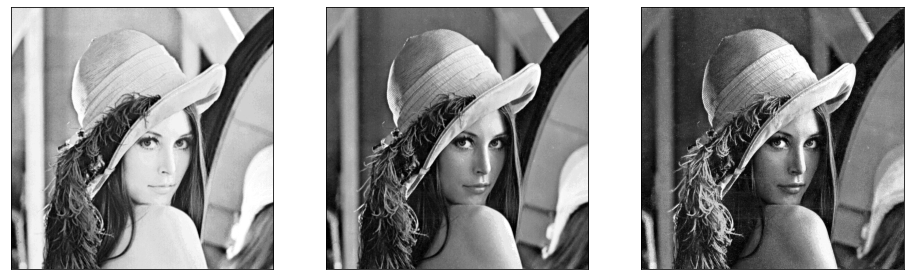

In [5]:
# plt.subplots()
plt.figure(figsize=(16,12))

plt.subplot(131)
plt.xticks([])
plt.yticks([])
plt.imshow(r, cmap='gray')

plt.subplot(132)
plt.xticks([])
plt.yticks([])
plt.imshow(g, cmap='gray')

plt.subplot(133)
plt.xticks([])
plt.yticks([])
plt.imshow(b, cmap='gray')

In [6]:
height, width = b.shape
b[:4,:4]

array([[121, 121, 129, 121],
       [121, 121, 129, 121],
       [121, 121, 129, 121],
       [121, 121, 129, 121]], dtype=uint8)

### 1.2 编写抽样函数 4:2:0 (均值抽样)

In [7]:
# sample_g
def sample_420(img):
    height, width = img.shape
    sample = np.zeros((height, width), dtype=np.uint8)
    for i in range(1, height, 2):
        for j in range(1, width, 2):
            num = int(img[i-1, j-1] / 4 + img[i-1, j] / 4 + img[i, j-1] / 4 + img[i, j] / 4)
            sample[i-1,j-1], sample[i-1,j], sample[i,j-1], sample[i,j] = num, num, num, num
    return sample

In [8]:
sample_g = sample_420(g)
sample_g = sample_g.astype(np.uint8)

sample_b = sample_420(b)
sample_b = sample_b.astype(np.uint8)

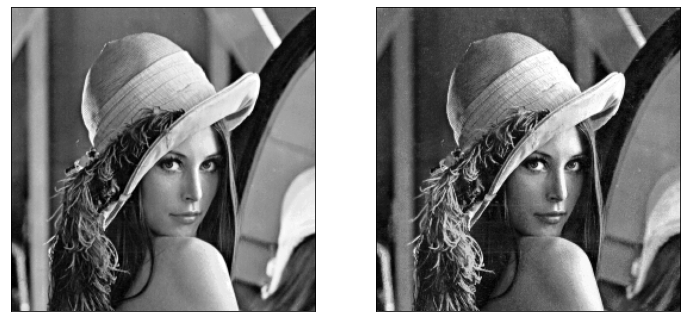

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_g, cmap='gray')
# cv2.imshow('sample_g', sample_g)
# cv2.waitKey(0)

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_b, cmap='gray')
# cv2.imshow('sample_b', sample_b)
# cv2.waitKey(0)

In [10]:
sample_b, b, sample_g, g,r

(array([[121, 121, 125, ..., 121,  97,  97],
        [121, 121, 125, ..., 121,  97,  97],
        [121, 121, 125, ..., 121,  97,  97],
        ...,
        [ 56,  56,  54, ...,  75,  72,  72],
        [ 56,  56,  82, ...,  74,  76,  76],
        [ 56,  56,  82, ...,  74,  76,  76]], dtype=uint8),
 array([[121, 121, 129, ..., 121, 105,  89],
        [121, 121, 129, ..., 121, 105,  89],
        [121, 121, 129, ..., 121, 105,  89],
        ...,
        [ 56,  56,  52, ...,  80,  72,  72],
        [ 56,  56,  64, ...,  76,  76,  76],
        [ 56,  56,  64, ...,  76,  76,  76]], dtype=uint8),
 array([[133, 133, 135, ..., 145, 107, 107],
        [133, 133, 135, ..., 145, 107, 107],
        [133, 133, 135, ..., 145, 107, 107],
        ...,
        [ 16,  16,  19, ...,  64,  61,  61],
        [ 16,  16,  38, ...,  66,  68,  68],
        [ 16,  16,  38, ...,  66,  68,  68]], dtype=uint8),
 array([[133, 133, 137, ..., 145, 121,  93],
        [133, 133, 137, ..., 145, 121,  93],
        [133, 13

###  1.3 输出合并后的图像

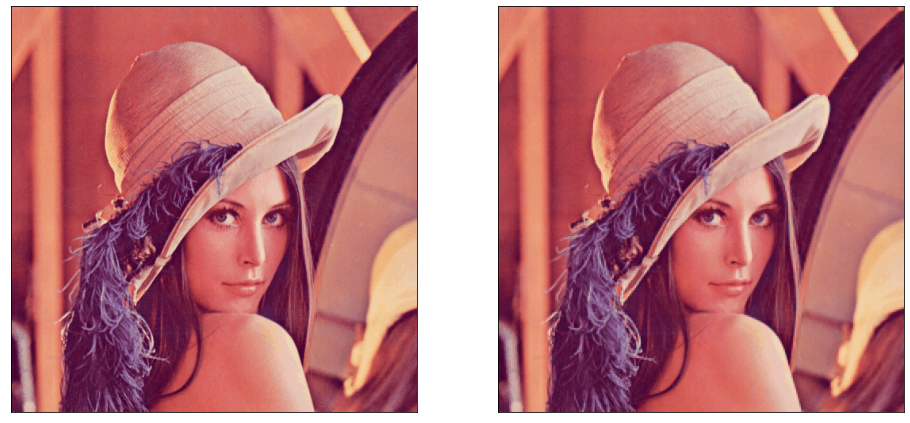

In [12]:
new_img = cv2.merge([r, sample_g, sample_b])

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(new_img)

### 1.4 信噪比PSNR


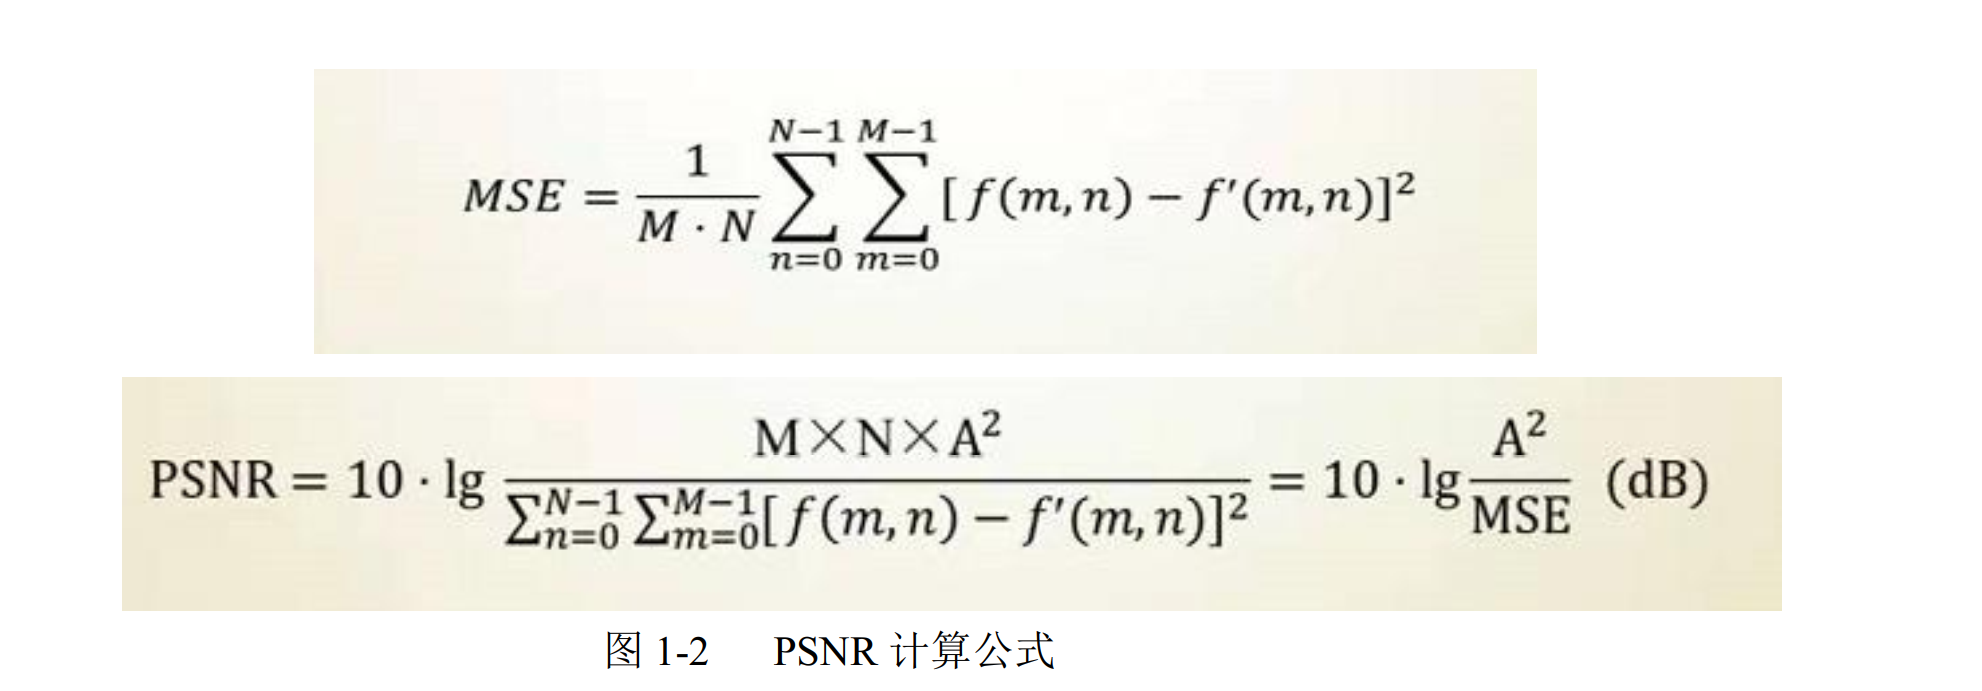

In [13]:
def compute_psnr(img_in, img_sam):
    assert img_in.shape == img_sam.shape, "The sample image's shape is not same as the input!"
    
    mse = np.mean( (img_in/255. - img_sam/255.) ** 2 )
    if mse < 1.0e-10:
        return 100
    return 20 * np.log10(1 / np.sqrt(mse))

In [14]:
bgr_psnr = compute_psnr(img, new_img)
# bgr_psnr
print(f'PSNR = {bgr_psnr:.4f}')

PSNR = 32.0429


## 2. RGB -> YCbCr

In [27]:
img = cv2.imread(files[-2])
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
yCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
yCrCb.shape

(512, 512, 3)

In [17]:
y, cr, cb = cv2.split(yCrCb)
# y.shape
y, cr, cb

(array([[158, 158, 163, ..., 166, 148, 124],
        [158, 158, 163, ..., 166, 148, 124],
        [158, 158, 163, ..., 166, 148, 124],
        ...,
        [ 40,  40,  44, ...,  98,  98,  92],
        [ 40,  40,  49, ..., 102, 102, 103],
        [ 40,  40,  49, ..., 102, 102, 103]], dtype=uint8),
 array([[174, 174, 173, ..., 171, 178, 181],
        [174, 174, 173, ..., 171, 178, 181],
        [174, 174, 173, ..., 171, 178, 181],
        ...,
        [157, 157, 160, ..., 179, 182, 184],
        [157, 157, 159, ..., 182, 182, 184],
        [157, 157, 159, ..., 182, 182, 184]], dtype=uint8),
 array([[107, 107, 109, ..., 103, 104, 108],
        [107, 107, 109, ..., 103, 104, 108],
        [107, 107, 109, ..., 103, 104, 108],
        ...,
        [137, 137, 133, ..., 118, 113, 117],
        [137, 137, 136, ..., 113, 113, 113],
        [137, 137, 136, ..., 113, 113, 113]], dtype=uint8))

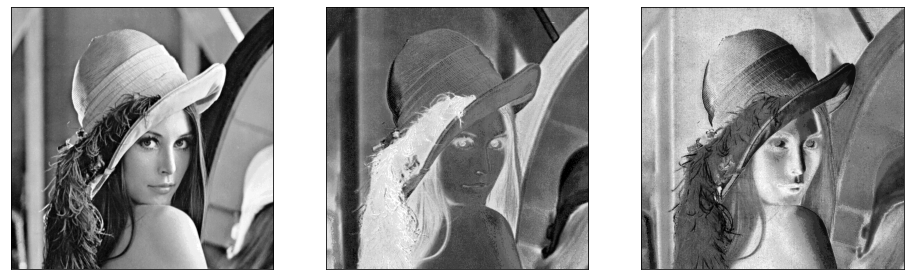

In [18]:
# 该输出方法仍有些差异
plt.figure(figsize=(16,12))
plt.subplot(131)
plt.xticks([])
plt.yticks([])
plt.imshow(y, cmap='gray')

plt.subplot(132)
plt.xticks([])
plt.yticks([])
plt.imshow(cb, cmap='gray')

plt.subplot(133)
plt.xticks([])
plt.yticks([])
plt.imshow(cr, cmap='gray')

In [19]:
# plt.figure(figsize=(16,12))
cv2.imshow('Y', y)
cv2.waitKey(0)

cv2.imshow('Cb', cb)
cv2.waitKey(0)

cv2.imshow('Cr', cr)
cv2.waitKey(0)

-1

-1

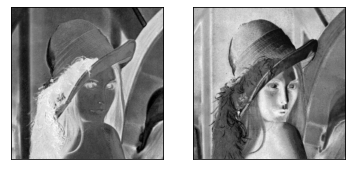

In [20]:
plt.figure(figsize=(12,8))

sample_cb = sample_420(cb)
sample_cb = sample_cb.astype(np.uint8)
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_cb, cmap='gray')
# cv2.imshow('sample_cb', sample_cb)
# cv2.waitKey(0)

sample_cr = sample_420(cr)
sample_cr = sample_cr.astype(np.uint8)
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_cr, cmap='gray')
# cv2.imshow('sample_cr', sample_cr)
# cv2.waitKey(0)

In [21]:
y, sample_cb, sample_cr

(array([[158, 158, 163, ..., 166, 148, 124],
        [158, 158, 163, ..., 166, 148, 124],
        [158, 158, 163, ..., 166, 148, 124],
        ...,
        [ 40,  40,  44, ...,  98,  98,  92],
        [ 40,  40,  49, ..., 102, 102, 103],
        [ 40,  40,  49, ..., 102, 102, 103]], dtype=uint8),
 array([[107, 107, 108, ..., 103, 106, 106],
        [107, 107, 108, ..., 103, 106, 106],
        [107, 107, 108, ..., 103, 106, 106],
        ...,
        [137, 137, 134, ..., 116, 115, 115],
        [137, 137, 139, ..., 113, 113, 113],
        [137, 137, 139, ..., 113, 113, 113]], dtype=uint8),
 array([[174, 174, 173, ..., 171, 179, 179],
        [174, 174, 173, ..., 171, 179, 179],
        [174, 174, 173, ..., 171, 179, 179],
        ...,
        [157, 157, 160, ..., 179, 181, 181],
        [157, 157, 156, ..., 182, 183, 183],
        [157, 157, 156, ..., 182, 183, 183]], dtype=uint8))

-1

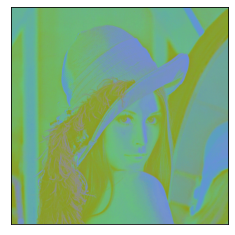

In [22]:
new_img_ycbcr = cv2.merge([y,sample_cr, sample_cb])
plt.xticks([])
plt.yticks([])
plt.imshow(new_img_ycbcr[...,::-1])
cv2.imshow('new_img_ycbcr', new_img_ycbcr)
cv2.waitKey(0)

In [23]:
bgr_psnr = compute_psnr(yCrCb, new_img_ycbcr)
print(f'PSNR = {bgr_psnr:.4f}')

PSNR = 41.1922


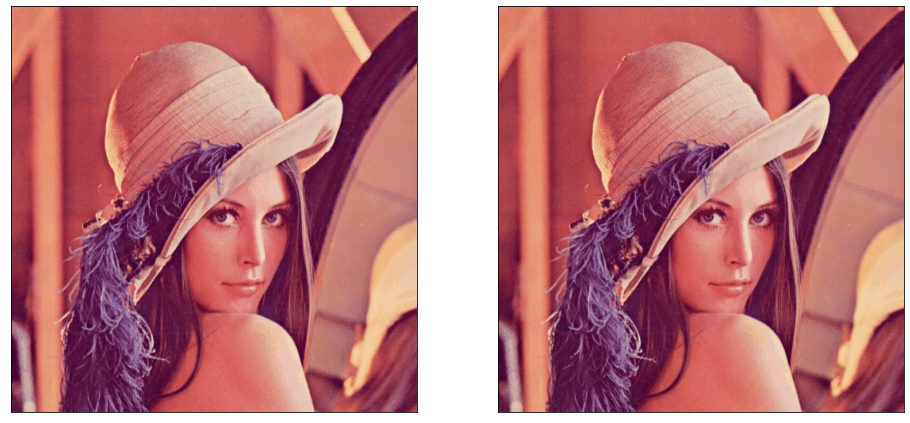

In [24]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(img[...,::-1])

ycbcr2rgb = cv2.cvtColor(new_img_ycbcr, cv2.COLOR_YCrCb2RGB)
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(ycbcr2rgb)

In [28]:
bgr_psnr = compute_psnr(rgb_img, ycbcr2rgb)
print(f'PSNR = {bgr_psnr:.4f}')

PSNR = 36.7718
